In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from collections import Counter
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
import warnings ## for filterout warnings
warnings.filterwarnings("ignore")


C:\Users\Gillu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gillu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
new_columns =['Invoice_Date', 'Job_Card_Date','Business_Partner_Name',
              'Vehicle_No','Vehicle_Model','Current_KM_Reading','INVOICE_LINE_TEXT']

data=pd.read_excel("service-data.xlsx", names= new_columns)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28484 entries, 0 to 28483
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice_Date           28482 non-null  datetime64[ns]
 1   Job_Card_Date          28482 non-null  datetime64[ns]
 2   Business_Partner_Name  28484 non-null  object        
 3   Vehicle_No             28484 non-null  object        
 4   Vehicle_Model          28482 non-null  object        
 5   Current_KM_Reading     28482 non-null  float64       
 6   INVOICE_LINE_TEXT      28449 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 1.5+ MB


In [4]:
data.head()

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [5]:
# Define a function

def Createdataset(df):

# Create a new column
    
    df['Spare_Part'] = df.Vehicle_Model+"---"+df.INVOICE_LINE_TEXT

# Set JOB_CARD_DATE AS INDEX

    df.index = df['Job_Card_Date']
    del df['Job_Card_Date']

    # set the frequency of Spare parts as 1
    df.loc[:,'Frequency'] = 1
    return df


def  CreatelistofSpareParts(df,ListofSpareParts):
     return Counter(df.Spare_Part).mostcommon(ListofSpareParts)
    
def df_resample(df, frequencyresample='W'):
    return df.resample(frequencyresample).sum()

def New_dataset(df, fromDate, toDate, SparePart=None): 
    
    
#Select rows with given SparePartName
    if(SparePart!=None):
        df= df.loc[(df.Spare_Part==SparePart),:]
        
                
#Selecting the rows between given date range
    return df.loc[fromDate:toDate,['Frequency']]

    


In [6]:
data=Createdataset(data)
data.head()

,Invoice_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Spare_Part,Frequency
Job_Card_Date,,,,,,,,
2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,BAJAJ AVENGER STREET 220---ENGINE OIL,1
2017-05-31,2017-06-02,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,BAJAJ PULSAR NS 200---ENGINE OIL,1
2017-05-31,2017-06-02,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,BAJAJ PULSAR NS 200---POLISH,1
2017-05-31,2017-06-02,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,BAJAJ PULSAR NS 200---CONSUMABLES,1
2017-05-31,2017-06-02,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,BAJAJ PULSAR NS 200---COOLANT OIL,1


In [7]:
Counter(data.Spare_Part).most_common(15)

[('BAJAJ PULSAR 150---ENGINE OIL', 1066),
 ('BAJAJ PULSAR 150---CHAIN LUBRICATION', 970),
 ('BAJAJ PULSAR 150---GENERAL SERVICE', 654),
 ('BAJAJ AVENGER STREET 220---ENGINE OIL', 591),
 ('BAJAJ PULSAR 150---AIR FILTER', 554),
 ('BAJAJ AVENGER STREET 220---CHAIN LUBRICATION', 540),
 ('BAJAJ PULSAR 150---3M OIL', 400),
 ('BAJAJ PULSAR 150---CONSUMABLES', 386),
 ('BAJAJ PULSAR 150---BRAKE SHOE', 386),
 ('BAJAJ AVENGER STREET 220---GENERAL SERVICE', 379),
 ('BAJAJ PULSAR 220---ENGINE OIL', 338),
 ('BAJAJ PULSAR 150---DISC OIL', 322),
 ('BAJAJ PULSAR 150---POLISH', 319),
 ('BAJAJ PULSAR 180---ENGINE OIL', 303),
 ('BAJAJ AVENGER STREET 220---AIR FILTER', 301)]

In [8]:
# Creating Sparepart specific dataset with given data ranges
fromDate ='2017-06-01'
toDate   ='2018-12-30'

#Create Dataset

df1= New_dataset(df=data,fromDate=fromDate, toDate=toDate, SparePart='BAJAJ PULSAR 150---ENGINE OIL')

#Resapmling dataset and split the dataset
df2= df_resample (df1,'W')

<AxesSubplot:xlabel='Job_Card_Date'>

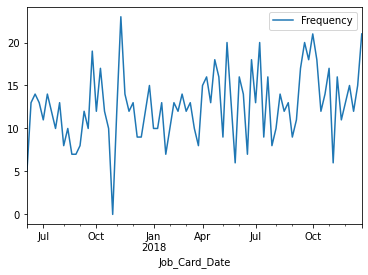

In [9]:
df2.plot()

In [10]:
df2.isnull().sum()

Frequency    0
dtype: int64

# Test Stationarity

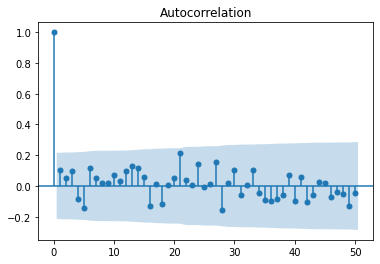

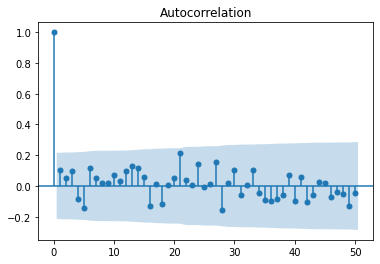

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df2,lags=50)


#Spiked decays shows data is stationary

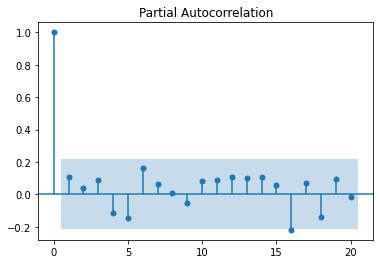

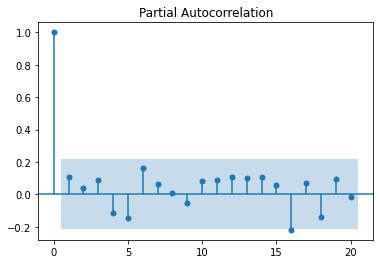

In [12]:
# Partial Autocorerelation 

plot_pacf(df2, lags=20)

# Convert Data into Stationary Format




               Frequency
Job_Card_Date           
2017-06-11           8.0
2017-06-18           1.0
2017-06-25          -1.0
2017-07-02          -2.0
2017-07-09           3.0


<AxesSubplot:xlabel='Job_Card_Date'>

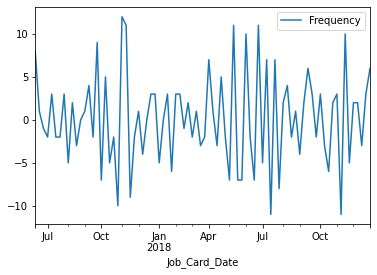

In [13]:
df2_diff=df2.diff(periods=1)
df2_diff=df2_diff[1:]
print(df2_diff.head())
df2_diff.plot()

# Split the Dateset


In [14]:
X= df2.values
size= int(len(X) * 0.70)
train,test= X[0:size], X[size:len(X)]

X_diff=df2_diff.values
size_diff= int(len(X_diff) * 0.70)
train_diff, test_diff = X_diff[0:size_diff], X_diff[size_diff:len(X_diff)]

In [15]:
len(X)

83

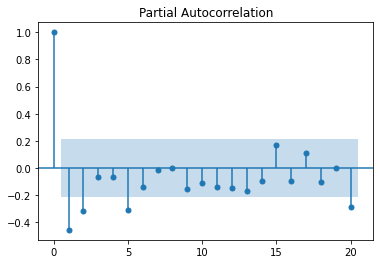

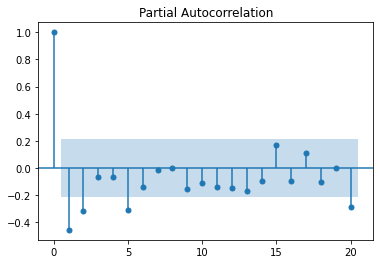

In [16]:
plot_pacf(df2_diff, lags=20)

# ARMA 

In [25]:
model_ar=ARMA(train_diff,order=(5,2))
model_ar_fit=model_ar.fit()

In [26]:
predictions = model_ar_fit.predict(start=size_diff, end=len(X_diff)-1)
print(predictions)
print(test_diff)
error=mean_squared_error(test_diff,predictions)
print('Test MSE: %.3f' % error)


[-3.95715724 -2.69045096 -1.40852732  1.82518934 -2.02509253  3.01724683
 -0.07299883  0.0901539  -0.37315234  0.40764062 -1.07444957  0.67692803
 -0.06338047  0.22511044  0.05468948  0.3246531  -0.27728106  0.21152899
 -0.05294341  0.07674695  0.03207576  0.17083024 -0.02210767  0.12907232
  0.02755553]
[[-11.]
 [  7.]
 [ -8.]
 [  2.]
 [  4.]
 [ -2.]
 [  1.]
 [ -4.]
 [  2.]
 [  6.]
 [  3.]
 [ -2.]
 [  3.]
 [ -3.]
 [ -6.]
 [  2.]
 [  3.]
 [-11.]
 [ 10.]
 [ -5.]
 [  2.]
 [  2.]
 [ -3.]
 [  3.]
 [  6.]]
Test MSE: 28.382


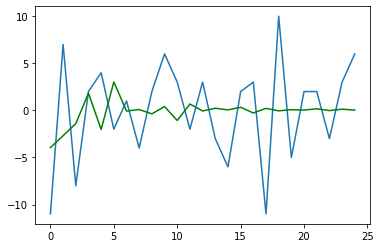

In [27]:
plt.plot(test_diff)
plt.plot(predictions,color='green')
plt.show()

# ARIMA

In [40]:
import itertools
p=d=q=range(0,5)
pdq =list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [41]:
import warnings
warnings.filterwarnings('ignore') 

for param in pdq:
    try:
        model_arima =ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 329.36820965909544
(0, 0, 1) 331.1183888161328
(0, 0, 2) 332.4165203901099
(0, 0, 3) 334.3755218913467
(0, 0, 4) 335.7332401562835
(0, 1, 0) 357.07259610150385
(0, 1, 1) 326.84067293064334
(0, 1, 2) 328.75106954353214
(0, 1, 3) 329.3424502567467
(0, 2, 0) 407.7742857370131
(0, 2, 1) 357.91139670162727
(1, 0, 0) 331.1683558695425
(1, 1, 0) 349.1758410437834
(1, 1, 1) 328.77457038910813
(1, 1, 2) 330.1738411355103
(1, 1, 3) 328.7679862628311
(1, 2, 0) 387.8803919172197
(2, 0, 0) 332.6945619450744
(2, 0, 1) 334.295057993084
(2, 1, 0) 341.02898915192463
(2, 1, 1) 329.90009835028957
(2, 2, 0) 364.0526293399378
(2, 2, 1) 343.5017504194593
(3, 0, 0) 334.4162395509277
(3, 0, 1) 336.0982711017259
(3, 0, 2) 335.3090073812867
(3, 1, 0) 342.8098875880795
(3, 1, 1) 331.8048145225413
(3, 1, 2) 333.4825564036908
(3, 2, 0) 360.62974390982583
(3, 2, 1) 345.3955108668377
(4, 0, 0) 334.512520207282
(4, 0, 1) 336.1071120314356
(4, 0, 2) 336.4001387268063
(4, 0, 3) 338.3955947275359
(4, 1, 0) 343

predicted=13.01, expected=9.00
predicted=12.70, expected=16.00
predicted=12.89, expected=8.00
predicted=13.74, expected=10.00
predicted=14.20, expected=14.00
predicted=14.34, expected=12.00
predicted=14.51, expected=13.00
predicted=14.54, expected=9.00
predicted=14.85, expected=11.00
predicted=14.87, expected=17.00
predicted=14.77, expected=20.00
predicted=14.24, expected=18.00
predicted=13.49, expected=21.00
predicted=14.84, expected=18.00
predicted=14.85, expected=12.00
predicted=14.41, expected=14.00
predicted=14.80, expected=17.00
predicted=15.04, expected=6.00
predicted=13.88, expected=16.00
predicted=15.12, expected=11.00
predicted=14.26, expected=13.00
predicted=14.55, expected=15.00
predicted=14.52, expected=12.00
predicted=14.38, expected=15.00
predicted=14.61, expected=21.00
Test RMSE: 3.982


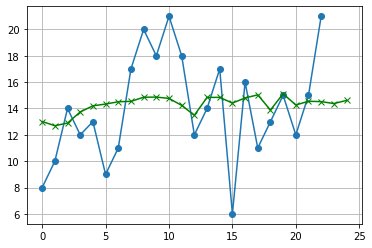

In [65]:
from math import sqrt
c_hat=0
c_obs=0

history = [x for x in train]
predictions = list()

# walk-forward validation

for t in range(len(test)):
    
    model = ARIMA(history, order=(1,1,3))
    model_fit = model.fit()
    output = model_fit.forecast(alpha=10)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    c_hat = c_hat + yhat
    c_obs = c_obs + obs
    print('predicted=%.2f, expected=%.2f' % ( yhat, obs))
    
# evaluate forecasts

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.grid()
plt.plot(test[2:],marker='o')
plt.plot(predictions, color='green',marker='x')
plt.show()